In [122]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [123]:
df = pd.read_csv('./breast-cancer-wisconsin.txt')

In [124]:
df.head()
#df.shape

,Index,ID,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,0,1241035,7,8,3,7,4,5,7,8,2,4
1,1,1107684,6,10,5,5,4,10,6,10,1,4
2,2,691628,8,6,4,10,10,1,3,5,1,4
3,3,1226612,7,5,6,3,3,8,7,4,1,4
4,4,1142706,5,10,10,10,6,10,6,5,2,4


## Missing data

In [125]:
# missing value proportions
100*df.isna().sum()/len(df)

Index                          0.0000
ID                             0.0000
Clump Thickness                0.0000
Uniformity of Cell Size        0.1766
Uniformity of Cell Shape       0.1766
Marginal Adhesion              0.1766
Single Epithelial Cell Size    0.1766
Bare Nuclei                    0.1766
Bland Chromatin                0.1766
Normal Nucleoli                0.1766
Mitoses                        0.1766
Class                          0.1766
dtype: float64

In [126]:
# 0. drop it
df.dropna(inplace=True)

## plotting y (Class)

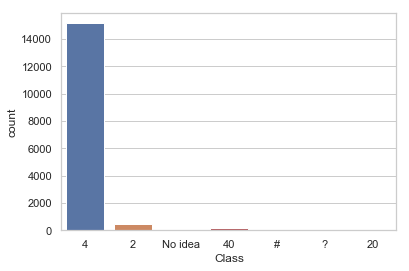

In [127]:
sns.set(style="whitegrid")
ax = sns.countplot(x="Class", data=df)

In [128]:
import matplotlib.pyplot as plt
%matplotlib inline

# sums = df.groupby(df.Class).sum()
# plt.axis('equal');
# plt.pie(sums, labels=sums.index);
# plt.show()

# df.groupby(df.Class).sum().plot(kind='pie')
# plt.axis('equal')
# plt.show()
#df.plot.pie(y='Class', figsize=(5, 5))

In [129]:
# len(df[df['Class'] == 'No idea'])
# len(df[df['Class'] == '#'])
# len(df[df['Class'] == '?'])
# len(df[df['Class'] == '20'])
# len(df[df['Class'] == '40'])
# len(df[df['Class'] == '4'])

df = df[(df['Class'] == '2') | (df['Class'] == '4') ]
type(df.columns.tolist())

list

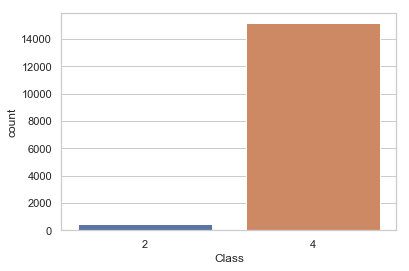

In [130]:
sns.countplot(x='Class',data=df)
plt.savefig('Breast_cancer_proportions.png',dpi=300)

## EDA

/Users/zhili/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


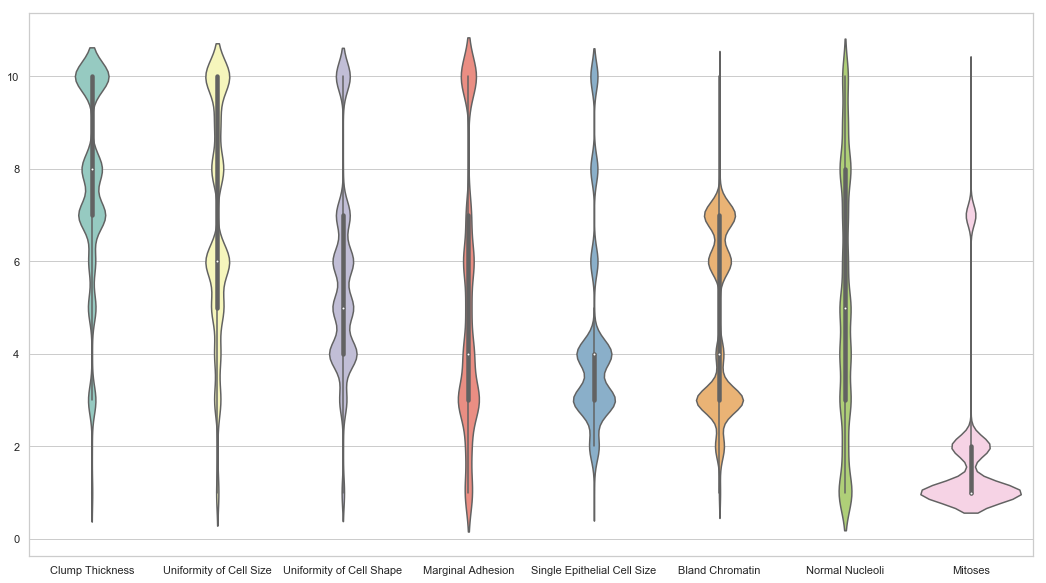

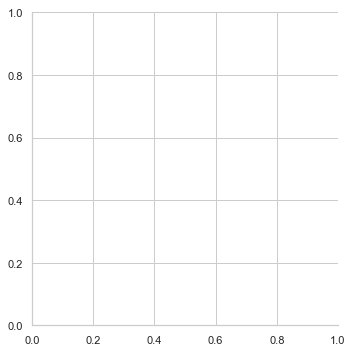

In [131]:
f, ax = plt.subplots(figsize = (18,10))
vio_df = df.drop(columns = ['Index', 'ID', 'Class'])
#vio_df_2 = vio_df[vio_df["Class"] == 2]
g = sns.catplot(data=vio_df, orient="v",palette="Set3", kind="violin", ax = ax)

In [132]:
#Convert to a format that easy to plot
df.head()
cancer_df = df.drop(columns = ['Index', 'ID'])
cancer_df = cancer_df.apply(pd.to_numeric,errors='coerce')
cancer_df.dropna(inplace=True)

#Convert to a format that easy to plot
df_long = pd.melt(cancer_df[list(cancer_df.columns)[1:]], "Class", var_name="Column_name", value_name="Value")
df_long.head()

,Class,Column_name,Value
0,4,Uniformity of Cell Size,8.0
1,4,Uniformity of Cell Size,10.0
2,4,Uniformity of Cell Size,6.0
3,4,Uniformity of Cell Size,5.0
4,4,Uniformity of Cell Size,10.0


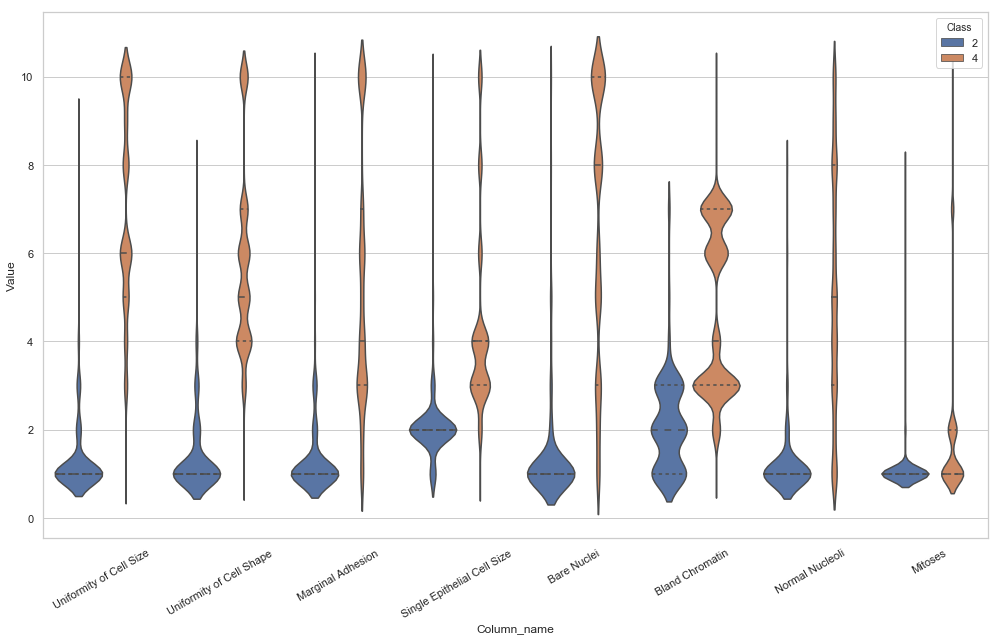

In [133]:
fig = plt.figure(figsize=(14,9))
ax = fig.add_subplot(111)
sns.violinplot(x='Column_name',y='Value',inner='quartile',data=df_long,hue='Class',split=False,ax=ax)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.savefig('Violinplot_cancers.png',dpi=200)
plt.tight_layout()
plt.show()

## Build model on the imbalance dataset

### simple LR

In [134]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics 
from sklearn.model_selection import  KFold, train_test_split, cross_val_score 
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import accuracy_score, recall_score, \
precision_score, roc_auc_score, classification_report, f1_score

def model_score(model):
    kf = KFold(n_splits=3, shuffle=True, random_state=0)
    m_score = cross_val_score(model, X, y, scoring="accuracy", cv=kf)
    return (m_score.mean())

In [135]:
df.head()

,Index,ID,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,0,1241035,7,8,3,7,4,5,7,8,2,4
1,1,1107684,6,10,5,5,4,10,6,10,1,4
2,2,691628,8,6,4,10,10,1,3,5,1,4
3,3,1226612,7,5,6,3,3,8,7,4,1,4
4,4,1142706,5,10,10,10,6,10,6,5,2,4


In [136]:
# from patsy import dmatrices 


# y, X = dmatrices('Class ~ Clump Thickness + Uniformity of Cell Size + Uniformity of Cell Shape\
#                  + Marginal Adhesion + Single Epithelial Cell Size + Bare Nuclei \
#                  + Bland Chromatin + Normal Nucleoli + Mitoses',df, return_type = 'dataframe')

In [137]:
cancer_df['Class'].replace(2, 0, inplace=True)
cancer_df['Class'].replace(4, 1, inplace=True)


X = cancer_df[list(cancer_df.columns)[:-1]]
y = cancer_df['Class']
X_tt, X_holdout, y_tt, y_holdout = train_test_split(X, y, test_size=0.33)

#data['sex'].replace(1, 'Male')
cancer_df.head()


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,7,8,3,7,4,5.0,7,8,2,1
1,6,10,5,5,4,10.0,6,10,1,1
2,8,6,4,10,10,1.0,3,5,1,1
3,7,5,6,3,3,8.0,7,4,1,1
4,5,10,10,10,6,10.0,6,5,2,1


In [138]:
X.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,7,8,3,7,4,5.0,7,8,2
1,6,10,5,5,4,10.0,6,10,1
2,8,6,4,10,10,1.0,3,5,1
3,7,5,6,3,3,8.0,7,4,1
4,5,10,10,10,6,10.0,6,5,2


In [139]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Class, dtype: int64

In [140]:
def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

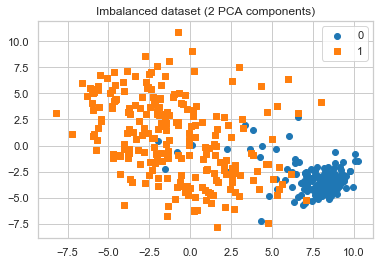

In [141]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
plot_X = pca.fit_transform(X)

plot_2d_space(plot_X, y, 'Imbalanced dataset (2 PCA components)')

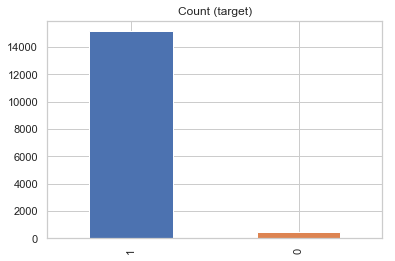

In [142]:
#df_test = pd.DataFrame(list(X_tt, y_tt), columns = ["samples", 'target'])
cancer_df.Class.value_counts().plot(kind='bar', title='Count (target)');

In [143]:
LR = LogisticRegression(penalty='l1',solver='liblinear')

In [144]:
scores = cross_validate(LR,X_tt,y_tt,cv=5,scoring='recall')
scores

/Users/zhili/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


{'fit_time': array([0.0577209 , 0.07249689, 0.10071802, 0.07294416, 0.07448506]),
 'score_time': array([0.00251222, 0.00205731, 0.00203109, 0.00211978, 0.00297093]),
 'test_score': array([0.99950763, 0.9985229 , 0.99901478, 0.99950739, 1.        ]),
 'train_score': array([0.99963059, 0.99938431, 0.99938439, 0.99975376, 0.99926127])}

In [145]:
LR.fit(X_tt,y_tt)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [146]:
y_class = LR.predict(X_holdout)

In [147]:
print(classification_report(y_holdout,y_class))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       140
           1       1.00      1.00      1.00      5010

   micro avg       1.00      1.00      1.00      5150
   macro avg       1.00      0.99      0.99      5150
weighted avg       1.00      1.00      1.00      5150



/Users/zhili/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=DeprecationWarning)


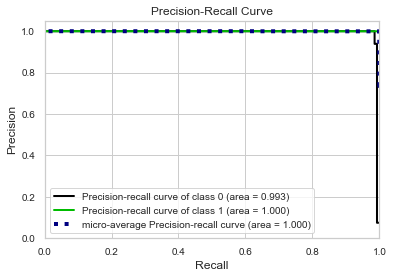

In [148]:
#import tools as challengetools
#challengetools.precision_recall(y_holdout,LR.predict_proba(X_holdout)[:,1])
#import scikitplot as skplt
#skplt.metrics.plot_precision_recall_curve(y_holdout,LR.predict_proba(X_holdout)[:,1])

import scikitplot as skplt
skplt.metrics.plot_precision_recall_curve(y_holdout,LR.predict_proba(X_holdout))
#probas = keras_clf.predict_proba(X_test, batch_size=64)

### undersampling

In [149]:
from imblearn.under_sampling import RandomUnderSampler

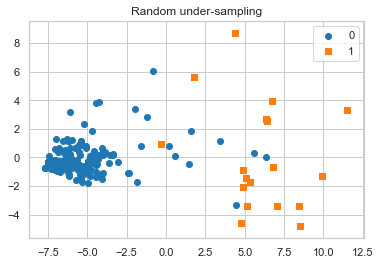

In [150]:

rus = RandomUnderSampler(return_indices=True)
X_rus, y_rus, id_rus = rus.fit_sample(X_tt, y_tt)

plot_2d_space(pca.fit_transform(X_rus), y_rus, 'Random under-sampling')

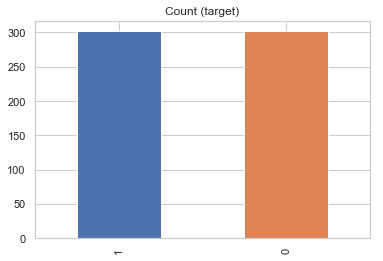

In [151]:
df_test_under = pd.DataFrame(list(zip(X_rus, y_rus)), columns = ["samples", 'target'])
df_test_under.target.value_counts().plot(kind='bar', title='Count (target)');

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus, test_size=0.33)

In [153]:
LR.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [154]:
y_class = LR.predict(X_holdout)

In [155]:
print(classification_report(y_holdout,y_class))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96       140
           1       1.00      1.00      1.00      5010

   micro avg       1.00      1.00      1.00      5150
   macro avg       0.96      1.00      0.98      5150
weighted avg       1.00      1.00      1.00      5150



### oversampling

14720 new random picked points


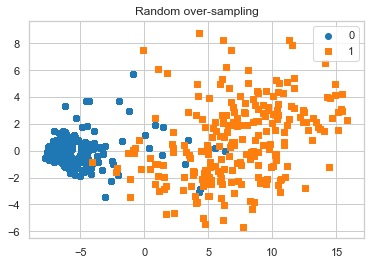

In [156]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_sample(X, y)

print(X_ros.shape[0] - X.shape[0], 'new random picked points')

plot_2d_space(pca.fit_transform(X_ros), y_ros, 'Random over-sampling')

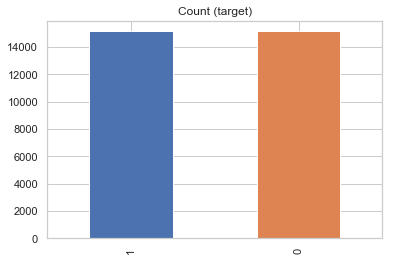

In [157]:
df_test_over = pd.DataFrame(list(zip(X_ros, y_ros)), columns = ["samples", 'target'])
df_test_over.target.value_counts().plot(kind='bar', title='Count (target)');

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size=0.33)
LR.fit(X_train,y_train)
y_class = LR.predict(X_holdout)
print(classification_report(y_holdout,y_class))
#X_holdout.head()


              precision    recall  f1-score   support

           0       0.92      0.99      0.96       140
           1       1.00      1.00      1.00      5010

   micro avg       1.00      1.00      1.00      5150
   macro avg       0.96      1.00      0.98      5150
weighted avg       1.00      1.00      1.00      5150



### oversampling -- smote

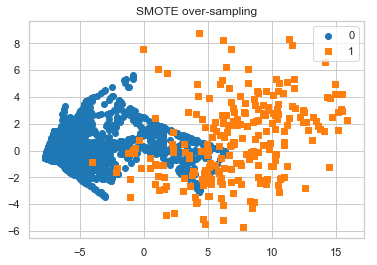

In [159]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(ratio='minority')
X_sm, y_sm = smote.fit_sample(X, y)

plot_2d_space(pca.fit_transform(X_sm), y_sm, 'SMOTE over-sampling')

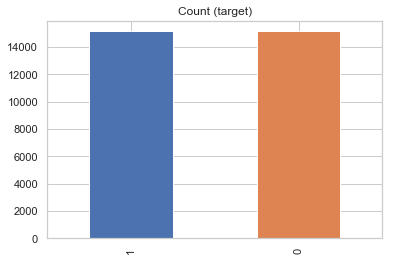

In [160]:
df_test_sm = pd.DataFrame(list(zip(X_sm, y_sm)), columns = ["samples", 'target'])
df_test_sm.target.value_counts().plot(kind='bar', title='Count (target)');

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus, test_size=0.33)
LR.fit(X_train,y_train)
y_class = LR.predict(X_holdout)
print(classification_report(y_holdout,y_class))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       140
           1       1.00      1.00      1.00      5010

   micro avg       1.00      1.00      1.00      5150
   macro avg       0.97      0.99      0.98      5150
weighted avg       1.00      1.00      1.00      5150



## Intepretation

In [162]:
LRCoeff = pd.DataFrame(list(zip(X.columns, np.transpose(LR.coef_))))
LRCoeff.columns = ['features', 'coeffs']
LRCoeff.sort_values(by=['coeffs'],ascending=False)

,features,coeffs
1,Uniformity of Cell Size,[1.4368519472233194]
5,Bare Nuclei,[0.5829442972226836]
8,Mitoses,[0.5758048880945941]
0,Clump Thickness,[0.4563840443391176]
3,Marginal Adhesion,[0.41568174312436773]
4,Single Epithelial Cell Size,[-0.03671571384997747]
2,Uniformity of Cell Shape,[-0.06089403653350141]
6,Bland Chromatin,[-0.15307785252064024]
7,Normal Nucleoli,[-0.6124558654403774]


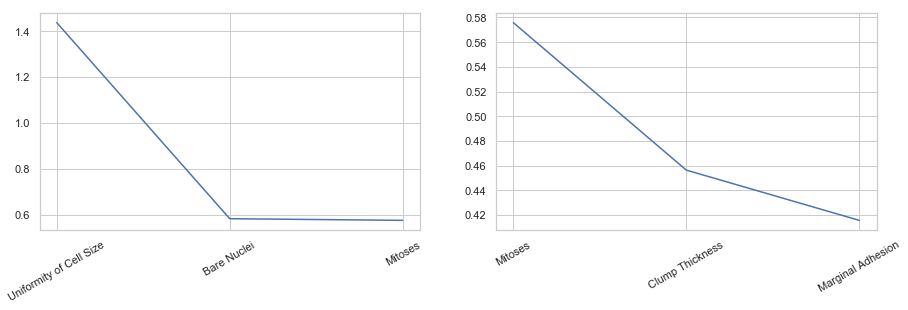

In [163]:
LRCoeff.columns = ['features', 'coeffs']
Leave = LRCoeff.sort_values(by=['coeffs'],ascending=False).head(8)
NotLeave = LRCoeff.sort_values(by=['coeffs'], ascending=False).tail(7)

plt.figure(figsize=(15, 4))

pf_num = 3
plt.subplot(1, 2, 1)
plt.plot(Leave['features'].iloc[0:pf_num],Leave['coeffs'].iloc[0:pf_num])
locs, labels = plt.xticks()
increase = plt.setp(labels, rotation=30)

plt.subplot(1, 2, 2)
plt.plot(NotLeave['features'].iloc[0:pf_num],NotLeave['coeffs'].iloc[0:pf_num])
locs, labels = plt.xticks()
decrease = plt.setp(labels, rotation=30)

In [164]:
def plot_coefficients(classifier, feature_names, top_features=3, save=False):
    coef = classifier.coef_.ravel()
    top_positive_coefficients = np.argsort(coef)[-top_features:]
    top_negative_coefficients = np.argsort(coef)[:top_features]
    top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
    plt.figure(figsize=(10, 10), dpi=300)
    colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
    plt.barh(np.arange(2*top_features), coef[top_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.yticks(np.arange(1, 1 + 2*top_features), feature_names[top_coefficients], rotation=0, ha='right')
    plt.show()

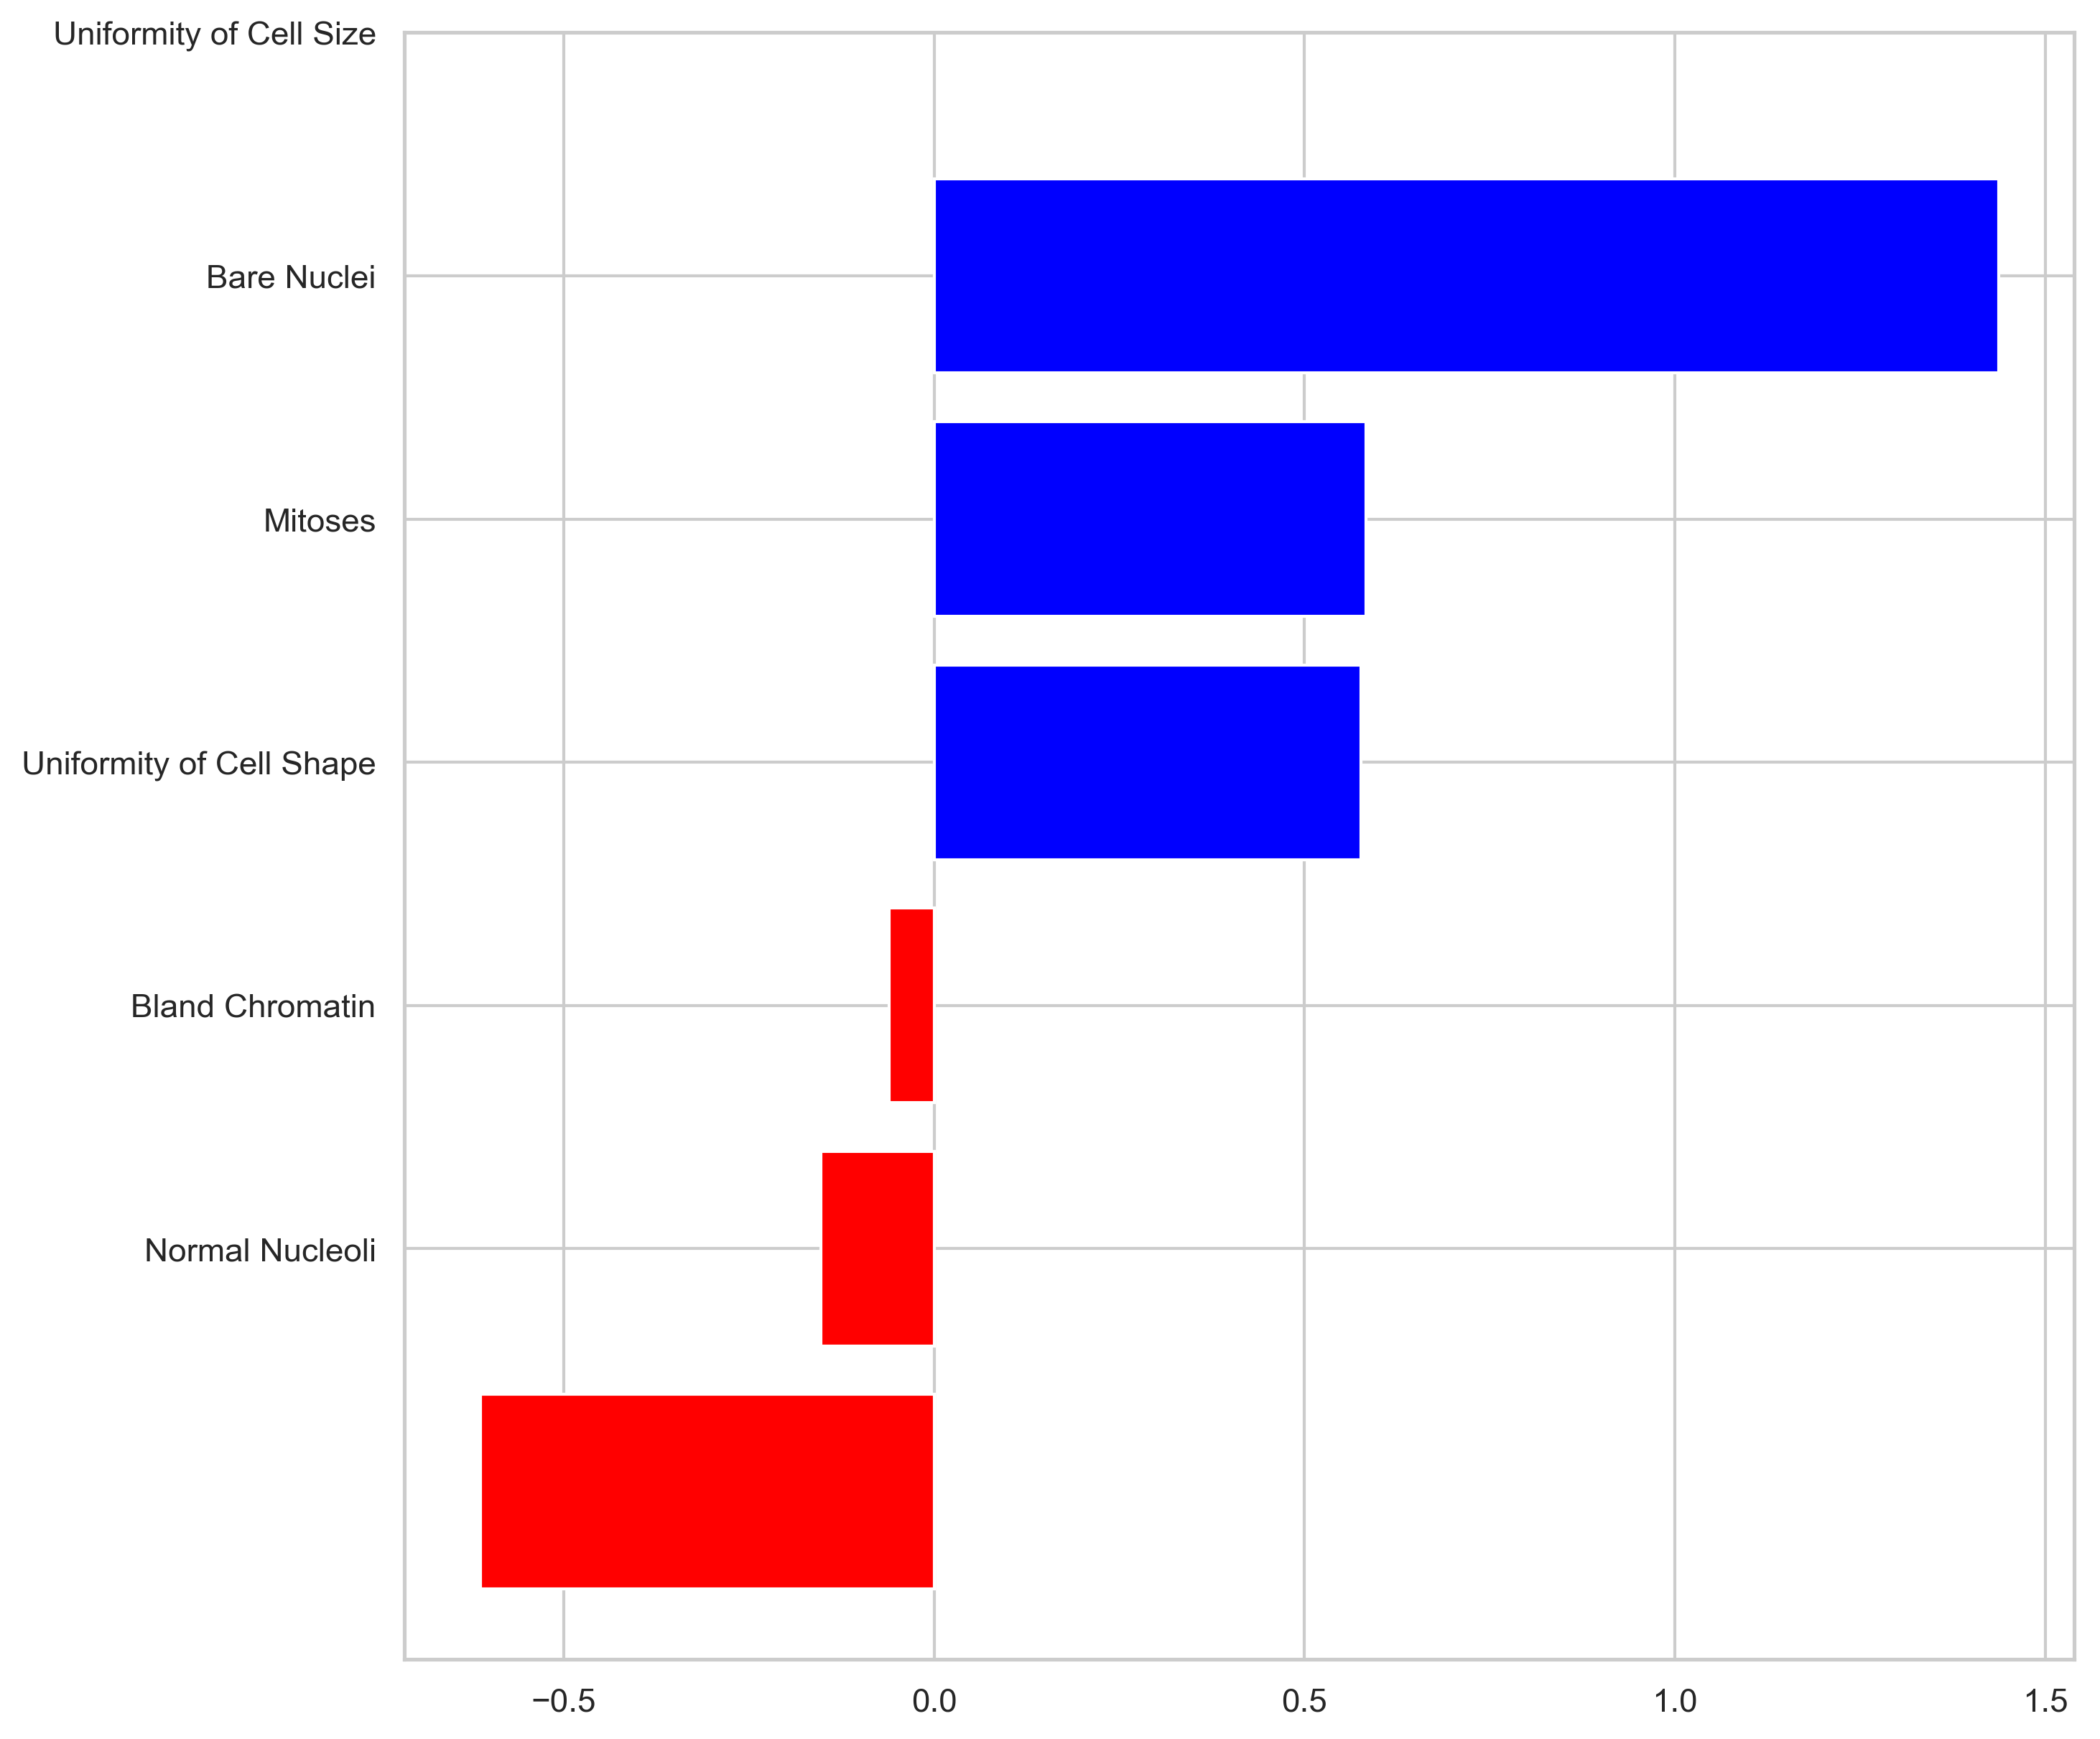

In [165]:
plot_coefficients(LR, X.columns)